In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load dataset
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


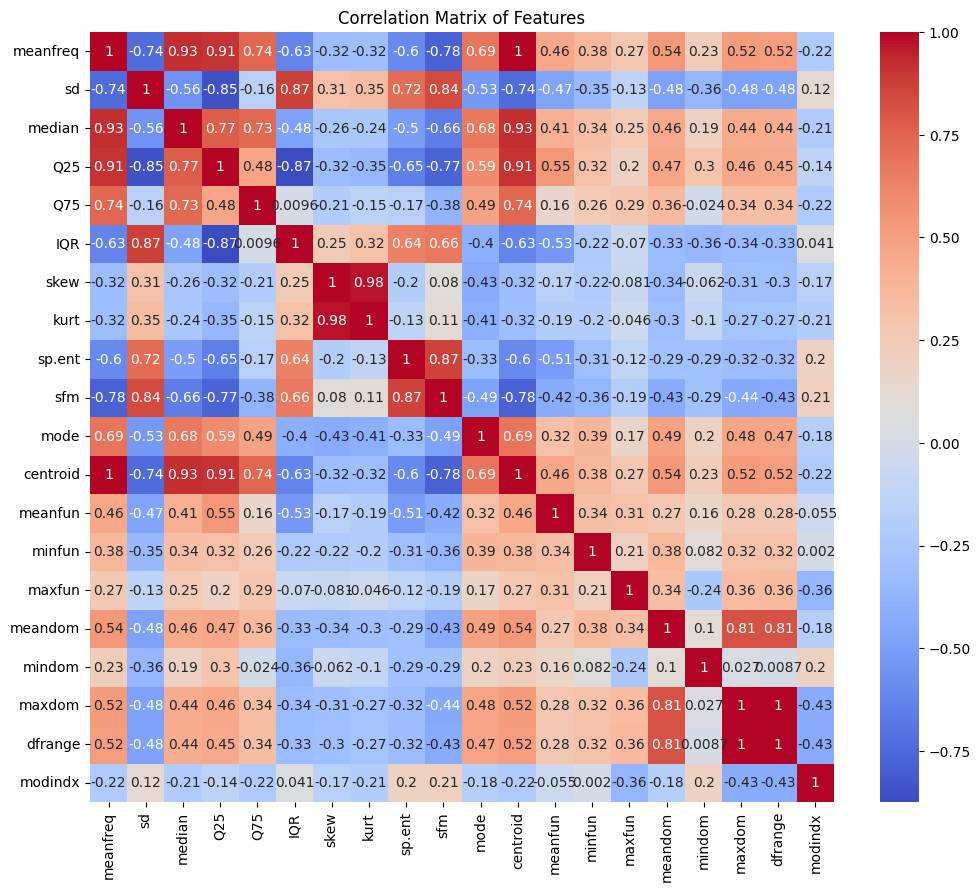

In [3]:
# Data visualization: correlation matrix
plt.figure(figsize=(12, 10))

# Exclude non-numeric columns (like 'label') from the correlation matrix
correlation = data.drop(columns=['label']).corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


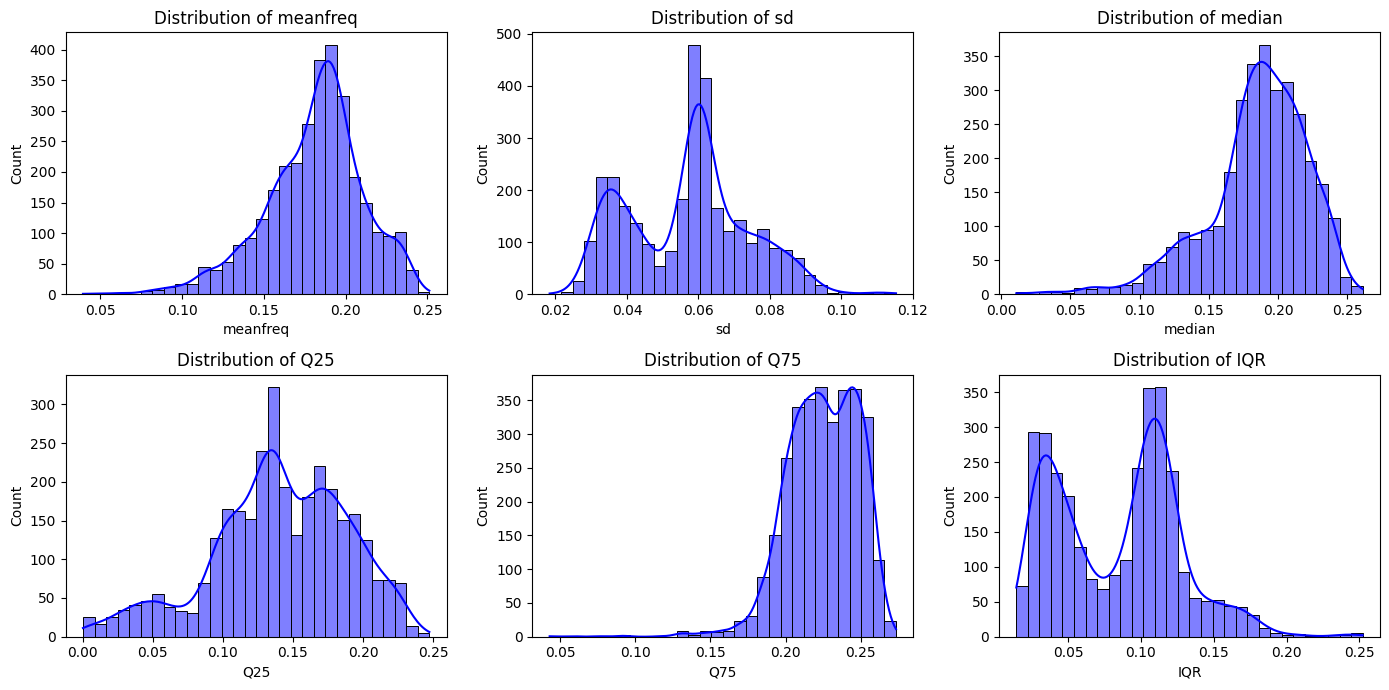

In [4]:
# Plot distributions of some key features
plt.figure(figsize=(14, 7))
for i, column in enumerate(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [5]:
# Preprocessing: splitting the dataset and scaling the features
X = data.drop(columns=['label'])
y = data['label'].apply(lambda x: 1 if x == 'male' else 0)  # Convert labels to binary


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [8]:
# Predict and evaluate KNN
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Classifier
Accuracy: 0.9810725552050473
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



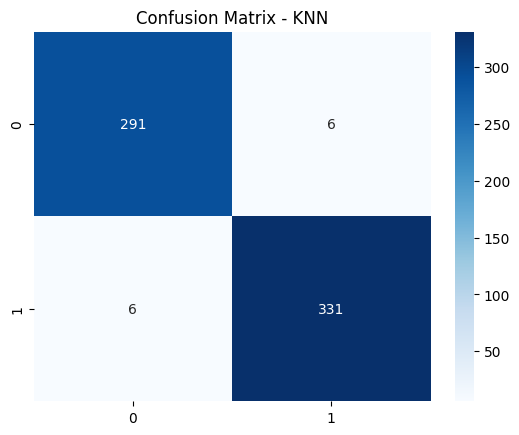

In [9]:
# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

In [10]:
# Neural Network (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [11]:
# Predict and evaluate MLP
y_pred_mlp = mlp.predict(X_test_scaled)
print("Neural Network Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network Classifier
Accuracy: 0.9842271293375394
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.99       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



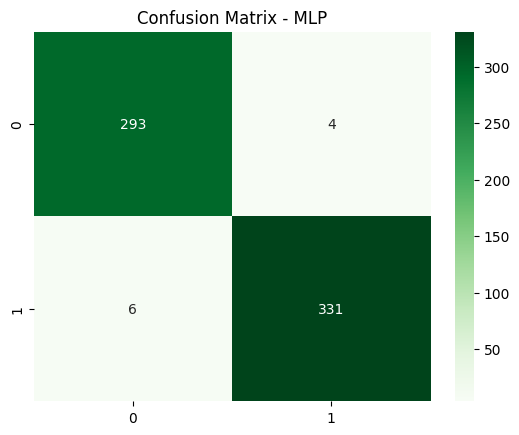

In [12]:
# Confusion matrix for MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - MLP')
plt.show()

In [13]:
# Random Forest Classifier
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [14]:
# Predict and evaluate Random Forest
y_pred_forest = forest.predict(X_test_scaled)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Classifier
Accuracy: 0.9826498422712934
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



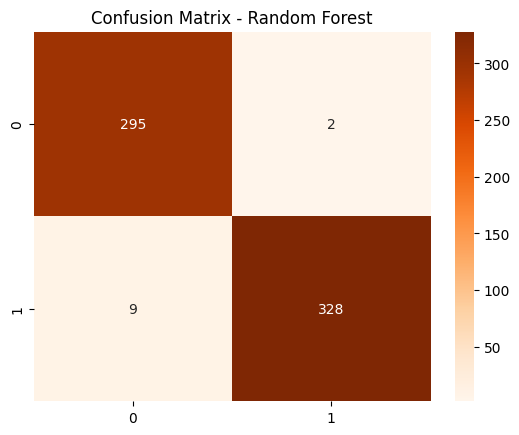

In [15]:
# Confusion matrix for Random Forest
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [17]:
# Import Support Vector Machine
from sklearn.svm import SVC

# Support Vector Machine Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
# Predict and evaluate SVM
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier
Accuracy: 0.9763406940063092
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



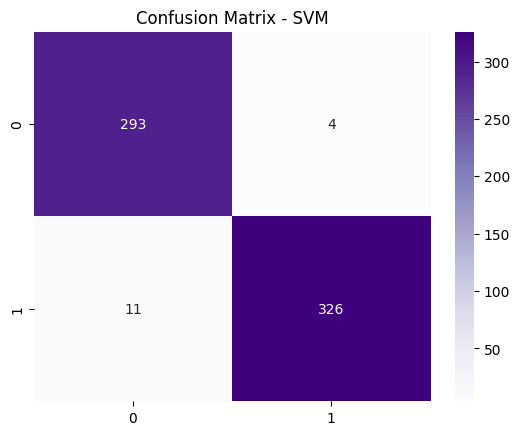

In [19]:
# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.show()

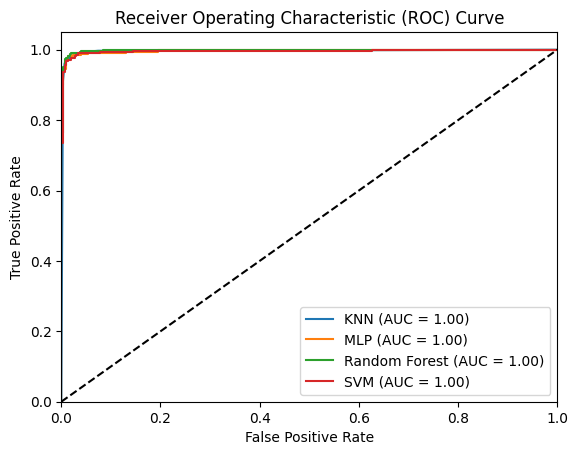

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_scores):.2f})')

# KNN ROC AUC
y_scores_knn = knn.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_knn, 'KNN')

# MLP ROC AUC
y_scores_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_mlp, 'MLP')

# Random Forest ROC AUC
y_scores_forest = forest.predict_proba(X_test_scaled)[:, 1]
plot_roc_curve(y_test, y_scores_forest, 'Random Forest')

# SVM ROC AUC
y_scores_svm = svm.decision_function(X_test_scaled)  # SVM uses decision function
plot_roc_curve(y_test, y_scores_svm, 'SVM')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
